<a href="https://colab.research.google.com/github/KaikyBN/Projeto-ProCode-Studio/blob/main/Entrega_2_Implementa%C3%A7%C3%A3o_de_Modelos_de_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhores parâmetros para classificação: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Relatório de Classificação (Modelo Otimizado):
                precision    recall  f1-score   support

     Complexos       0.46      0.60      0.52        40
Intermediários       0.62      0.40      0.48        40
      Pequenos       0.62      0.65      0.63        40

      accuracy                           0.55       120
     macro avg       0.57      0.55      0.55       120
  weighted avg       0.57      0.55      0.55       120



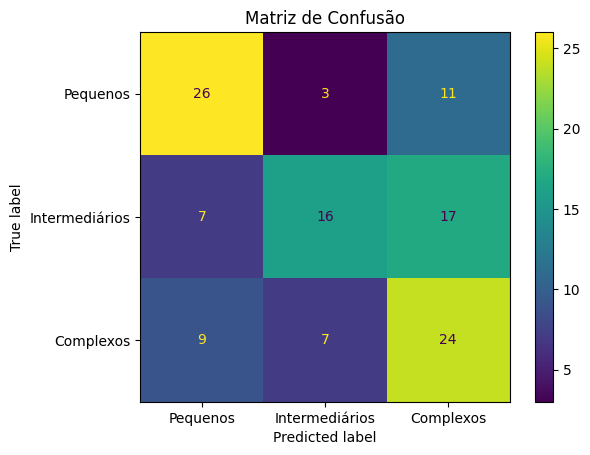

Melhores parâmetros para regressão: {'alpha': 0.01}
Erro Quadrático Médio (MSE) após otimização: 121856816496.37


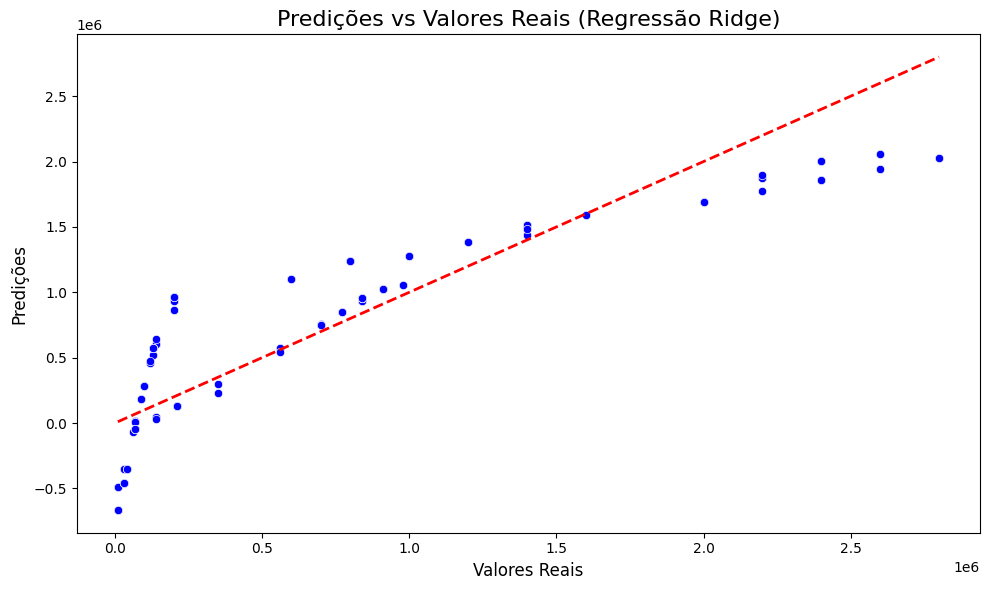

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Geração de Dados Balanceados
np.random.seed(42)
projetos = np.random.choice(["Pequenos", "Intermediários", "Complexos"], size=100)
quantidade_contratos = np.random.randint(1, 15, size=100)
valor_projeto = np.random.choice([10000, 70000, 200000], size=100)
lucro_mensal = quantidade_contratos * valor_projeto

# Criando o DataFrame
data = pd.DataFrame({
    "TipoProjeto": projetos,
    "QuantidadeContratos": quantidade_contratos,
    "ValorMedio": valor_projeto,
    "LucroMensal": lucro_mensal
})

# Balanceamento do dataset
data_balanced = pd.concat([
    resample(data[data["TipoProjeto"] == "Pequenos"], replace=True, n_samples=40, random_state=42),
    resample(data[data["TipoProjeto"] == "Intermediários"], replace=True, n_samples=40, random_state=42),
    resample(data[data["TipoProjeto"] == "Complexos"], replace=True, n_samples=40, random_state=42)
])

# Preparo dos dados
X = data_balanced[["QuantidadeContratos", "ValorMedio"]]
y_clf = data_balanced["TipoProjeto"]
y_reg = data_balanced["LucroMensal"]

# Otimização do modelo de classificação com Random Forest
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
clf = RandomForestClassifier(random_state=42)
grid_clf = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy")  # cv reduzido para evitar erros
grid_clf.fit(X, y_clf)

# Melhor modelo de classificação
best_clf = grid_clf.best_estimator_
print(f"Melhores parâmetros para classificação: {grid_clf.best_params_}")

# Avaliação com validação cruzada
y_clf_pred = cross_val_predict(best_clf, X, y_clf, cv=3)

# Relatório de classificação
print("Relatório de Classificação (Modelo Otimizado):")
print(classification_report(y_clf, y_clf_pred, zero_division=0))

# Matriz de confusão
cm = confusion_matrix(y_clf, y_clf_pred, labels=data_balanced["TipoProjeto"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_balanced["TipoProjeto"].unique())
disp.plot(cmap="viridis")
plt.title("Matriz de Confusão")
plt.show()

# Otimização do modelo de regressão com Ridge
param_grid_reg = {"alpha": [0.01, 0.1, 1.0, 10.0]}
ridge = Ridge()
grid_reg = GridSearchCV(ridge, param_grid_reg, cv=3, scoring="neg_mean_squared_error")
grid_reg.fit(X, y_reg)

# Melhor modelo de regressão
best_reg = grid_reg.best_estimator_
print(f"Melhores parâmetros para regressão: {grid_reg.best_params_}")

# Avaliação com validação cruzada
y_reg_pred = cross_val_predict(best_reg, X, y_reg, cv=3)
mse = mean_squared_error(y_reg, y_reg_pred)
print(f"Erro Quadrático Médio (MSE) após otimização: {mse:.2f}")

# Gráfico de predições vs valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_reg, y=y_reg_pred, color="blue")
plt.plot([min(y_reg), max(y_reg)], [min(y_reg), max(y_reg)], color="red", linestyle="--", linewidth=2)
plt.title("Predições vs Valores Reais (Regressão Ridge)", fontsize=16)
plt.xlabel("Valores Reais", fontsize=12)
plt.ylabel("Predições", fontsize=12)
plt.tight_layout()
plt.show()